# Sample script for Hybrid VAE model

### imports

In [1]:
%matplotlib inline

from torch.autograd import Variable
from torch import optim
import torch.nn as nn
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
import numpy as np

# local imports
from helpers import kl_loss
from visualize import plotSamples
from models import HybridVAE
from ToyDatasets.timeSeries import Sinusoids

## Define dataset loader

In [2]:
batch_size = 256
num_steps = 16
dataset_size = 1000

data_loader = DataLoader(Sinusoids(num_steps,virtual_size=dataset_size),batch_size=batch_size,shuffle=True)

batch_loader = iter(data_loader)

## Define and load model

In [3]:
model = HybridVAE(conv_size=128,rnn_size=128,latent_size=64)
model.eval()
model.load_state_dict(torch.load("Saved_models/HybridVAE.pt"))

## Collect some samples and plot

In [4]:
def sampleCompare(batch_loader,model):
    sampled_data = {"x":[],"recon_x":[]}
    try:
        batch = next(batch_loader)
    except StopIteration:
        batch_loader = iter(data_loader)
        batch = next(batch_loader)
    x = Variable(batch).type(torch.FloatTensor).transpose(1,0)
    recon_x = model.sample(num_samples=x.size()[1],num_steps=x.size()[0])
    sampled_data["x"] = x.squeeze(2)
    sampled_data["recon_x"] = recon_x.squeeze(2)
    plotSamples(sampled_data["x"],xu=num_steps,yu=1)
    plotSamples(sampled_data["recon_x"],xu=num_steps,yu=1)

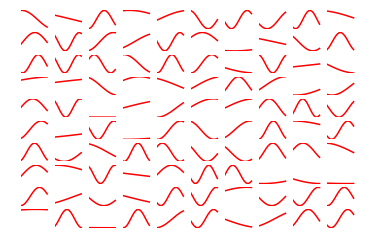

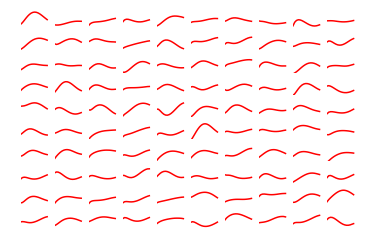

In [5]:
sampleCompare(batch_loader,model)